In [20]:
import networkx as nx
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt
import nb_general as nb

The following is the derivation of the non-backtracking pagerank when a graph $G$ is bipartite and biregular. It should first be recalled that the matrix $B$ can be written as $$B=\begin{pmatrix}0&B_2\\B_1&0\end{pmatrix}.$$

We also recall that Arrigo et al derived the formula for non-backtracking pagerank:
$$(I-\alpha B^T\hat{D}^{-1})\hat{y}=\frac{(1-\alpha)}{n}T^T(TT^T)^{-1}\mathbf{1},$$
where $\hat{D}$ is the edge degree matrix and $T$ is the degree out matrix. Since $G$ is bipartite, 
$$T=\begin{pmatrix}T_1&0\\0&T_2\end{pmatrix}.$$

To verify the derivation, let $G=K_{2,4}$.

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


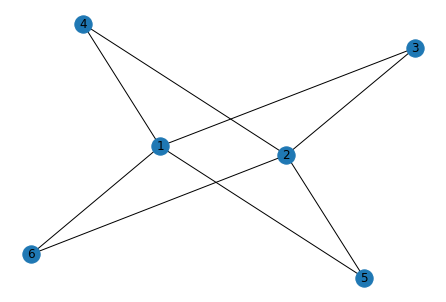

In [41]:
G = nx.Graph()
G.add_nodes_from(range(1,7))
G.add_edges_from([[1,3],[1,4],[1,5],[1,6],[2,3],[2,4],[2,5],[2,6]])
# G = nx.bipartite.random_graph(3,3,.7)
nx.draw(G,with_labels=True)
plt.show()

In [67]:
A = nx.adjacency_matrix(G).todense()
D = np.diag(np.array(A.sum(axis=1)).reshape((6,)))
S, T = nb.create_s_t(G)
C, B = nb.to_edge_space(G,graph=False, B = True)
D_hat = np.diag(np.array(B.sum(axis=1)).reshape((B.shape[1],)))

We now derive the pagerank vector of a bipartite graph.
Arrigo et al's formula becomes
$$\Biggl(\begin{pmatrix}I_1&0\\0&I_2\end{pmatrix}-\alpha\begin{pmatrix}0&B_1^T\\B_2^T&0\end{pmatrix}\begin{pmatrix}\frac{1}{d_2-1}&0\\0&\frac{1}{d_1-1}\end{pmatrix}\Biggr)\hat{y}=\frac{1-\alpha}{n}\begin{pmatrix}T_1^T&0\\0&T_2^T\end{pmatrix}\begin{pmatrix}\frac{1}{d_1}&0\\0&\frac{1}{d_2}\end{pmatrix}\mathbf{1}.$$
In this $d_1$ is the degree of the first partition, and $d_2$ is the degree of the second partition.

The following code verifies that $\hat{D}^{-1}=\begin{pmatrix}\frac{1}{d_2-1}&0\\0&\frac{1}{d_1-1}\end{pmatrix}$ and $TT^T=\begin{pmatrix}d_1&0\\0&d_2\end{pmatrix}$.

In [70]:
d_1 = D[0,0]
d_2 = D[-1,-1]
print(f'$d_1$={d_1}')
print(f'$d_2$={d_2}')

# Check \hat{D}^{-1}
print(f'D_hat={D_hat}')

# Check TT^T
print(f'TT^T={T@T.T}')

$d_1$=4
$d_2$=2
D_hat=[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]
TT^T=[[4. 0. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 2.]]


We examine the right side of the equation. On the right side we have
$$\frac{1-\alpha}{n}\begin{pmatrix}T_1^T&0\\0&T_2^T\end{pmatrix}\begin{pmatrix}\frac{1}{d_1}&0\\0&\frac{1}{d_2}\end{pmatrix}\mathbf{1}.$$
Multiplying we get 
$$\frac{1-\alpha}{n}\begin{pmatrix}\frac{1}{d_1}T_1^T&0\\0&\frac{1}{d_2}T_2^T\end{pmatrix}\mathbf{1}.$$
Recall that $T$ is the out degree matrix. Thus $T^T\mathbf{1}$ count the number of nodes that point to a certain edge (the edge in-degree). Note that edges can only have on degree pointing to them. So $T^T\mathbf{1}=\mathbf{1}$ (i.e., 1 is an eigenvalue of $T^T$ with eigenvector $\mathbf{1}$). We can then simplify the right side of the equation to
$$\frac{1-\alpha}{n}\begin{pmatrix}\frac{1}{d_1}\mathbf{1}\\\frac{1}{d_2}\mathbf{1}\end{pmatrix}.$$

The following confirms that $T^T$ has an eigenvector $\mathbf{1}$ with eigenvalue 1. We also confirm the right side of the equation.

In [72]:
T.T.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [76]:
T.T@(la.solve(T@T.T,np.eye(T.shape[0])))@np.ones(T.shape[0])

array([0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 ])

Knowing this, the pagerank equation becomes
$$\Biggl(\begin{pmatrix}I_1&0\\0&I_2\end{pmatrix}-\alpha\begin{pmatrix}0&\frac{1}{d_1-1}B_1^T\\\frac{1}{d_2-1}B_2^T\end{pmatrix}\Biggr)\hat{y}=\frac{1-\alpha}{n}\begin{pmatrix}\frac{1}{d_1}\mathbf{1}\\\frac{1}{d_2}\mathbf{1}\end{pmatrix}.$$
We use the inverse of the matrix on the left side of the equation to get
$$\hat{y}=\frac{1-\alpha}{n}\Biggl(\begin{pmatrix}I_1&0\\0&I_2\end{pmatrix}-\alpha\begin{pmatrix}0&\frac{1}{d_1-1}B_1^T\\\frac{1}{d_2-1}B_2^T\end{pmatrix}\Biggr)^{-1}\begin{pmatrix}\frac{1}{d_1}\mathbf{1}\\\frac{1}{d_2}\mathbf{1}\end{pmatrix}.$$
We note the solution to a geometric series on the right side of the equation and replace the inverse matrix with a geometric series.
$$\hat{y}=\frac{1-\alpha}{n}\Biggl(\sum_{r=0}^\infty\alpha^r\begin{pmatrix}0&\frac{1}{d_1-1}B_1^T\\\frac{1}{d_2-1}B_2^T\end{pmatrix}^r\Biggr)\begin{pmatrix}\frac{1}{d_1}\mathbf{1}\\\frac{1}{d_2}\mathbf{1}\end{pmatrix}$$
By induction, we can rewrite this sum as
$$\sum_{r=0}^\infty\alpha^r\begin{pmatrix}0&\frac{1}{d_1-1}B_1^T\\\frac{1}{d_2-1}B_2^T\end{pmatrix}^r=\sum_{r=0}^\infty\alpha^{2r}\begin{pmatrix}\Bigl(\frac{1}{(d_1-1)(d_2-1)}B_1^TB_2^T\Bigr)^r&0\\0&\Bigl(\frac{1}{(d_1-1)(d_2-1)}B_2^TB_1^T\Bigr)^r\end{pmatrix}+\sum_{r=0}^\infty\alpha^{2r+1}\begin{pmatrix}0&\frac{1}{d_1-1}B_1^T\Bigl(\frac{1}{(d_1-1)(d_2-1)}B_2^TB_1^T\Bigr)^r\\\frac{1}{d_2-1}B_2^T\Bigr(\frac{1}{(d_1-1)(d_2-1)}B_1^TB_2^T\Bigr)^r&0\end{pmatrix}.$$
So we can rewrite the pagerank equation as
$$\hat{y}=\frac{1-\alpha}{n}\Biggl(\sum_{r=0}^\infty\alpha^{2r}\begin{pmatrix}\Bigl(\frac{1}{(d_1-1)(d_2-1)}B_1^TB_2^T\Bigr)^r&0\\0&\Bigl(\frac{1}{(d_1-1)(d_2-1)}B_2^TB_1^T\Bigr)^r\end{pmatrix}+\sum_{r=0}^\infty\alpha^{2r+1}\begin{pmatrix}0&\frac{1}{d_1-1}B_1^T\Bigl(\frac{1}{(d_1-1)(d_2-1)}B_2^TB_1^T\Bigr)^r\\\frac{1}{d_2-1}B_2^T\Bigr(\frac{1}{(d_1-1)(d_2-1)}B_1^TB_2^T\Bigr)^r&0\end{pmatrix}\Biggr)\begin{pmatrix}\frac{1}{d_1}\mathbf{1}\\\frac{1}{d_2}\mathbf{1}\end{pmatrix}.$$
We now distribute the vector $\begin{pmatrix}\frac{1}{d_1}\mathbf{1}&\frac{1}{d_2}\mathbf{1}\end{pmatrix}^T$. This results in the equation
$$\hat{y}=\frac{1-\alpha}{n}\Biggl(\sum_{r=0}^\infty\alpha^{2r}\begin{pmatrix}\Bigl(\frac{1}{(d_1-1)(d_2-1)}B_1^TB_2^T\Bigr)^r&0\\0&\Bigl(\frac{1}{(d_1-1)(d_2-1)}B_2^TB_1^T\Bigr)^r\end{pmatrix}\begin{pmatrix}\frac{1}{d_1}\mathbf{1}\\\frac{1}{d_2}\mathbf{1}\end{pmatrix}+\sum_{r=0}^\infty\alpha^{2r+1}\begin{pmatrix}0&\frac{1}{d_1-1}B_1^T\Bigl(\frac{1}{(d_1-1)(d_2-1)}B_2^TB_1^T\Bigr)^r\\\frac{1}{d_2-1}B_2^T\Bigr(\frac{1}{(d_1-1)(d_2-1)}B_1^TB_2^T\Bigr)^r&0\end{pmatrix}\begin{pmatrix}\frac{1}{d_1}\mathbf{1}\\\frac{1}{d_2}\mathbf{1}\end{pmatrix}\Biggr).$$
Multiplying each matrix by $\begin{pmatrix}\frac{1}{d_1}\mathbf{1}&\frac{1}{d_2}\mathbf{1}\end{pmatrix}^T$, we get
$$\hat{y}=\frac{1-\alpha}{n}\Biggl(\sum_{r=0}^\infty\alpha^{2r}\begin{pmatrix}\frac{1}{d_1}\Bigl(\frac{1}{(d_1-1)(d_2-1)}B_1^TB_2^T\Bigr)^r\mathbf{1}\\\frac{1}{d_2}\Bigl(\frac{1}{(d_1-1)(d_2-1)}B_2^TB_1^T\Bigr)^r\mathbf{1}\end{pmatrix}+\sum_{r=0}^\infty\alpha^{2r+1}\begin{pmatrix}\frac{1}{d_2(d_1-1)}B_1^T\Bigl(\frac{1}{(d_1-1)(d_2-1)}B_2^TB_1^T\Bigr)^r\mathbf{1}\\\frac{1}{d_1(d_2-1)}B_2^T\Bigr(\frac{1}{(d_1-1)(d_2-1)}B_1^TB_2^T\Bigr)^r\mathbf{1}\end{pmatrix}\Biggr).$$

We now show that both $B_1^T$ and $B_2^T$ have $\mathbf{1}$ as an eigenvector.